In [0]:
import numpy as np
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.preprocessing import Normalizer


In [2]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

In [3]:
datafile = pd.read_csv('bangalore-cas-alerts.csv', header='infer', sep=',', error_bad_lines=False, warn_bad_lines = False)
datafile.head()

,deviceCode_deviceCode,deviceCode_location_latitude,deviceCode_location_longitude,deviceCode_location_wardName,deviceCode_pyld_alarmType,deviceCode_pyld_speed,deviceCode_time_recordedTime_$date
0,864504031502210,12.984595,77.744087,Kadugodi,PCW,32,2018-02-01T01:48:59.000Z
1,864504031502210,12.984595,77.744087,Kadugodi,PCW,32,2018-02-01T01:48:59.000Z
2,864504031502210,12.987233,77.741119,Garudachar Playa,FCW,41,2018-02-01T01:50:00.000Z
3,864504031502210,12.987233,77.741119,Garudachar Playa,FCW,41,2018-02-01T01:50:00.000Z
4,864504031502210,12.987503,77.740051,Hudi,Overspeed,37,2018-02-01T01:50:11.000Z


In [4]:
gpsdata = datafile[['deviceCode_location_latitude','deviceCode_location_longitude']]
gpsdata.head()

,deviceCode_location_latitude,deviceCode_location_longitude
0,12.984595,77.744087
1,12.984595,77.744087
2,12.987233,77.741119
3,12.987233,77.741119
4,12.987503,77.740051


In [5]:
normalizer = Normalizer().fit(gpsdata)
normalgps = normalizer.transform(gpsdata)
len(normalgps)

207617

In [6]:
print(normalgps)

[[0.16473532 0.98633781]
 [0.16473532 0.98633781]
 [0.164774   0.98633135]
 ...
 [0.16453577 0.98637112]
 [0.16460039 0.98636034]
 [0.16462273 0.98635661]]


Number of clusters: 28


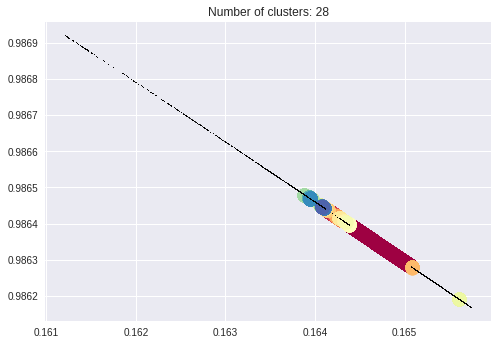

In [7]:
db = DBSCAN(eps=0.000001, min_samples=100).fit(normalgps)
samples_initial = np.zeros_like(db.labels_, dtype=bool)
samples_initial[db.core_sample_indices_] = True
labels = db.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
print('Number of clusters: %d' % n_clusters_)
import matplotlib.pyplot as plt

unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = normalgps[class_member_mask & samples_initial]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = normalgps[class_member_mask & ~samples_initial]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
            markeredgecolor='k', markersize=1)

plt.title('Number of clusters: %d' % n_clusters_)
plt.show()

In [9]:
f = np.column_stack((normalgps,labels))
LabelDF= pd.DataFrame(data=f, columns=['lon','lat','lab'])
for i in unique_labels:
    sec = LabelDF[LabelDF.lab == i]
    merged = pd.merge(sec,datafile,left_index=True,right_index=True)
    print(merged[['deviceCode_location_latitude','deviceCode_location_longitude','lab']])

        deviceCode_location_latitude  deviceCode_location_longitude  lab
0                          12.984595                      77.744087  0.0
1                          12.984595                      77.744087  0.0
2                          12.987233                      77.741119  0.0
3                          12.987233                      77.741119  0.0
4                          12.987503                      77.740051  0.0
5                          12.987503                      77.740051  0.0
6                          12.987523                      77.736702  0.0
7                          12.987523                      77.736702  0.0
8                          12.988210                      77.731369  0.0
9                          12.988210                      77.731369  0.0
10                         12.988226                      77.731293  0.0
11                         12.988226                      77.731293  0.0
12                         12.991210               